In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Input, Activation, Dropout, Flatten, Dense
import json
import random as rn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
data_dir='./data'
num_classes = 13
batch_size = 32
image_size = (224, 224)
inputs = tf.keras.Input(shape=(224, 224, 3))

In [4]:

def generate_datasets(data_dir, validation_split=0.2):
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="training",
    seed=42,
    labels="inferred",
    label_mode="categorical",
    image_size=image_size,
    batch_size=batch_size)

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=validation_split,
        subset="validation",
        seed=42,
        labels="inferred",
        label_mode="categorical",
        image_size=image_size,
        batch_size=batch_size)
    return train_ds, val_ds

In [13]:
def augment_dataset(train_dataset, validation_dataset):
    def augment_images(image, label):
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_flip_up_down(image)
        # image = tf.image.random_brightness(image, 0.2)
        # image = tf.image.random_contrast(image, 0.5, 1.5)
        image = tf.image.random_saturation(image, 1.2, 1.8) # make colors more vibrant
        image = tf.image.random_hue(image, 0.5)
        # image = tf.image.random_resized_crop(image, size, scale=(0.08, 1.0), ratio=(0.75, 1.33), seed=None, name=None)
        return image, label

    aug_train_ds = train_dataset.map(augment_images, num_parallel_calls=tf.data.AUTOTUNE)
    aug_val_ds = validation_dataset.map(augment_images, num_parallel_calls=tf.data.AUTOTUNE)

    image, _ = next(iter(aug_train_ds.take(1)))
    # peek
    plt.imshow(image[1])
    plt.show()
    
    return aug_train_ds, aug_val_ds

In [6]:
# Basic Models
def create_basic_model_v1():
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return tf.keras.models.Model(inputs, outputs, name='basic_model')


# Model 2: Added Second 64 Convolution
def create_basic_model_v2():
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return tf.keras.models.Model(inputs, outputs, name='model2')


# Model 3: Added 128 Convolution
def create_basic_model_v3():
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return tf.keras.models.Model(inputs, outputs, name='model3')


# Model 4: Added Second 64 and 128 Convolution
def create_basic_model_v4():
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return tf.keras.models.Model(inputs, outputs, name='model4')

In [7]:
#  The Nitin Models

models = []


# nitin/model 5: Added Second 64 and Two 128 Convolutions - Nitin OG Model
'''
nitin: nitin with 128 in dense layer

loss: 0.6349431872367859
acc: 0.7990543842315674
val_loss: 1.4293123483657837,1.1320741176605225
val_acc: 0.6799242496490479
'''
# x = Conv2D(32, (3, 3), activation='relu')(inputs)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(32, (3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(128, (3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(128, (3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Flatten()(x)
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.2)(x)
# outputs = Dense(num_classes, activation='softmax')(x)
# model = tf.keras.models.Model(inputs, outputs, name='model5')
# models.append(model)


'''
nitin_v1: nitin with 128 in dense layer

loss: 0.4386548697948456
acc: 0.8586288690567017
val_loss: 1.2631622552871704, 1.3866934776306152
val_acc: 0.6912878751754761
'''
# x = Conv2D(32, (3, 3), activation='relu')(inputs)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(32, (3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(128, (3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(128, (3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Flatten()(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.2)(x)
# outputs = Dense(num_classes, activation='softmax')(x)
# model = tf.keras.models.Model(inputs, outputs, name='nitin_v1')
# models.append(model)



'''
nitin_v2: nitin_v1 with 0.3 dropout

loss: 0.5874566435813904,
        0.5362315773963928
acc: 0.8269503712654114
val_loss: 1.2584004402160645,
        1.1817359924316406
val_acc: 0.6875
'''
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = tf.keras.models.Model(inputs, outputs, name='nitin_v2')
models.append(model)


'''
nitin_v3: nitin_v1 with 0.5 dropout

loss: 0.4386548697948456
acc: 0.8586288690567017
val_loss: 1.2631622552871704, 1.3866934776306152
val_acc: 0.6912878751754761
'''
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = tf.keras.models.Model(inputs, outputs, name='nitin_v3')
models.append(model)


# Nitin 
'''
nitin_v4: nitin with 5x5 filter for first 4 layers

loss:  1.037519931793213,
        0.9835840463638306
acc: 0.6874704360961914
val_loss: 1.4748997688293457,
        1.4654990434646606
val_acc: 0.6003788113594055
'''
x = Conv2D(32, (5, 5), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = tf.keras.models.Model(inputs, outputs, name='nitin_v4')
models.append(model)


'''
nitin_v5: nitin with 64 starting filter

results: this resulted in overfitting - accuracy rose at an increased rate while validation accuracy rose at a slower rate, stopped early

loss: 0.4386548697948456
acc: 0.8586288690567017
val_loss: 1.2631622552871704, 1.3866934776306152
val_acc: 0.6912878751754761
'''
x = Conv2D(64, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = tf.keras.models.Model(inputs, outputs, name='nitin_v5')
models.append(model)

In [8]:
# The Colin Models
def create_colin_v1():
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return tf.keras.models.Model(inputs, outputs, name='colin')

In [9]:
# The Grant Models (chat gpt models)
def create_grant_v1():
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.25)(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.25)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    return tf.keras.models.Model(inputs, outputs, name='grantv1')

In [10]:
# Training
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.85:
            self.model.save("./archive/{}/{}_{}.h5".format(model.name, model.name, epoch))
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

callback = myCallback()


def train_model(model, train_ds, val_ds, optimizer, optimizer_name):
    
    model._name = f'{model.name}_{optimizer_name}'
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy',
                        'MeanSquaredError',
                        'AUC',])

    history = model.fit(
        train_ds,
        epochs=200,
        validation_data=val_ds,
        callbacks=[callback])

    with open(f'./archive/{model.name}-history.json', 'w') as f:
        json.dump(history.history, f)


def train_models(models, train_ds, val_ds, optimizer, optimizer_name):
    for model in models:
        train_model(model, train_ds, val_ds, optimizer, optimizer_name)

In [11]:
optimizers = {
# 'sgd': tf.keras.optimizers.SGD(learning_rate=0.001),  # no bueno
'adadelta': tf.keras.optimizers.Adadelta(learning_rate=1.0), # not bad. overfit early, need to do l1/l2 reg.
# 'rmsprop': tf.keras.optimizers.RMSprop(learning_rate=0.001), # no beuno
'nadam': tf.keras.optimizers.Nadam(learning_rate=0.001),
'adam': tf.keras.optimizers.Adam(learning_rate=0.001)}


def test_optimizers(model):
    for k, v in optimizers.items():
        train_model(model,k,v)

Found 2643 files belonging to 13 classes.
Using 2115 files for training.
Found 2643 files belonging to 13 classes.
Using 528 files for validation.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


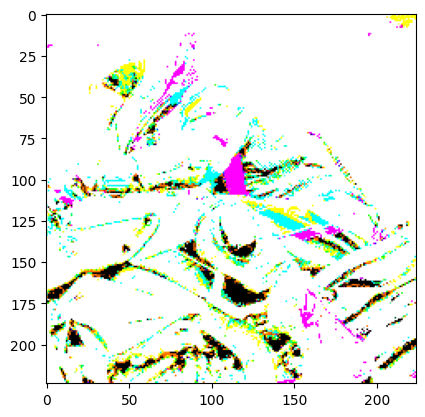

Epoch 1/200
67/67 [==============================] - 14s 94ms/step - loss: 20.3910 - accuracy: 0.1305 - mean_squared_error: 0.0822 - auc: 0.5127 - val_loss: 2.5555 - val_accuracy: 0.1402 - val_mean_squared_error: 0.0709 - val_auc: 0.5792
Epoch 2/200
67/67 [==============================] - 7s 95ms/step - loss: 2.5485 - accuracy: 0.1480 - mean_squared_error: 0.0708 - auc: 0.5926 - val_loss: 2.5327 - val_accuracy: 0.1402 - val_mean_squared_error: 0.0706 - val_auc: 0.6123
Epoch 3/200
67/67 [==============================] - 7s 95ms/step - loss: 2.5213 - accuracy: 0.1404 - mean_squared_error: 0.0705 - auc: 0.6071 - val_loss: 2.4968 - val_accuracy: 0.1515 - val_mean_squared_error: 0.0702 - val_auc: 0.6251
Epoch 4/200
67/67 [==============================] - 7s 94ms/step - loss: 2.4901 - accuracy: 0.1612 - mean_squared_error: 0.0701 - auc: 0.6242 - val_loss: 2.4976 - val_accuracy: 0.1723 - val_mean_squared_error: 0.0702 - val_auc: 0.6215
Epoch 5/200
67/67 [==============================] - 7

In [14]:
t_ds, v_ds = generate_datasets(data_dir)
train_ds, val_ds = augment_dataset(t_ds, v_ds)

models = {
    "basic_model_v1`": create_basic_model_v1(),
    "model_v2": create_basic_model_v2(),
    "model_v3": create_basic_model_v3(),
    "model_v4": create_basic_model_v4(),
    "colin_v1": create_colin_v1(),
    "grant_v1": create_grant_v1()    
}

train_models(models.values(), train_ds, val_ds, optimizers.get('adam'), 'adam')


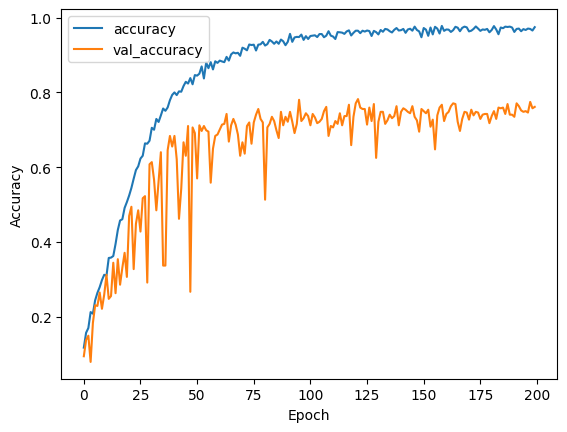

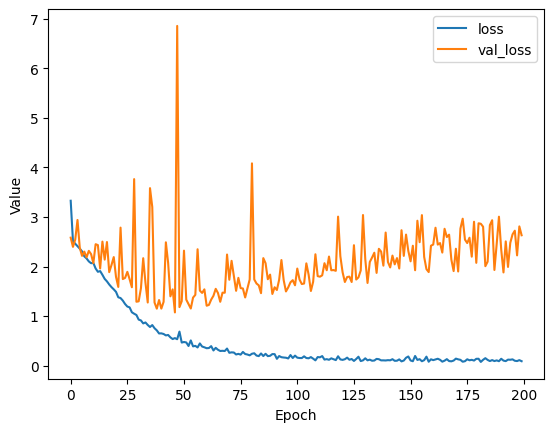

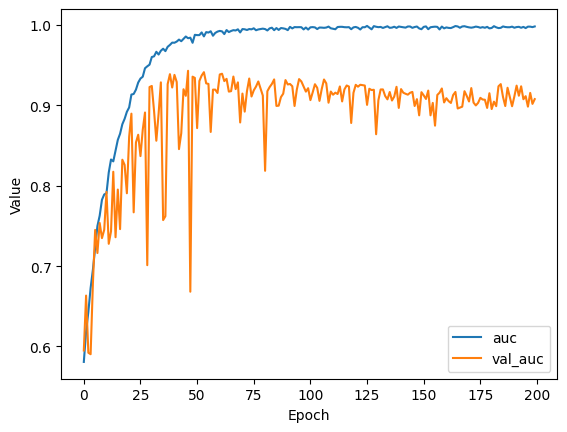

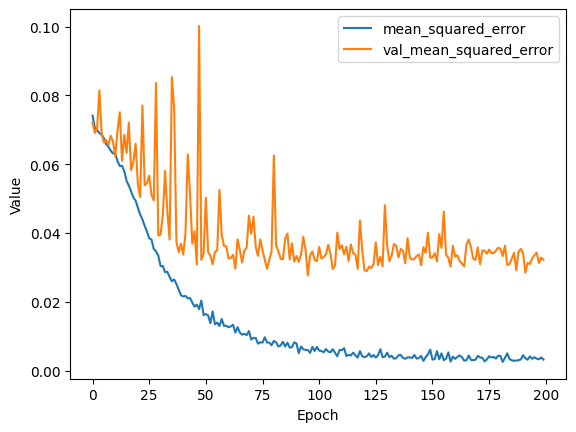

loss
accuracy
mean_squared_error
auc
val_loss
val_accuracy
val_mean_squared_error
val_auc


In [ ]:
def plot_history(model_history_file_path):
    with open(model_history_file_path, "r") as file:
        data = json.load(file)
    plt.plot(data['accuracy'], label="accuracy")
    plt.plot(data['val_accuracy'], label='val_accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    plt.plot(data['loss'], label='loss')
    plt.plot(data['val_loss'], label='val_loss')
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend()
    plt.show()
    plt.plot(data['auc'], label='auc')
    plt.plot(data['val_auc'], label='val_auc')
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend()
    plt.show()
    plt.plot(data['mean_squared_error'], label='mean_squared_error')
    plt.plot(data['val_mean_squared_error'], label='val_mean_squared_error')
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

plot_history("./archive/colin_adadelta-history.json")

In [ ]:
# ugly predict
# get_classes = tf.keras.preprocessing.image_dataset_from_directory(
#     "./data/",
#     label_mode='categorical',
#     image_size=image_size,
#     batch_size=batch_size)

# dir2predict = rn.choice(get_classes.class_names)
# print("class to predict: {}".format(dir2predict))

# photos_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     f"./data/{dir2predict}/",
#     label_mode=None,
#     image_size=image_size,
#     batch_size=batch_size)

# model = tf.keras.models.load_model('./archive/colin_v1/colin_v1_73.h5')
# # model.summary()
# # Make predictions on the images in the dataset
# predictions = model.predict(photos_ds)
# # print(predictions)

# class_indices = np.argmax(predictions, axis=-1)

# class_labels = list(get_classes.class_names)

# predicted_classes = [class_labels[index] for index in class_indices]
# # print(predicted_classes)
# x = [x for x in predicted_classes if dir2predict in x]
# print(f'count correct: {len(x)}')
# print(f'count total: {len(predicted_classes)}')
# print(f'percent correct: {len(x)/len(predicted_classes)}')

Found 2643 files belonging to 13 classes.
class to predict: CMP_Black_Daytona_21
Found 218 files belonging to 1 classes.
7/7 [==============================] - 1s 94ms/step
count correct: 176
count total: 218
percent correct: 0.8073394495412844
